In [1]:
import torch
from PIL import Image
import numpy as np
from CRAFT import CRAFTModel, draw_boxes, draw_polygons, boxes_area, polygons_area

In [2]:
model = CRAFTModel('weights/', 'cuda:0', use_refiner=True, fp16=True)

/home/user/conda/lib/python3.7/site-packages/huggingface_hub/file_download.py:654: FutureWarning: 'cached_download' is the legacy way to download files from the HF hub, please consider upgrading to 'hf_hub_download'
  FutureWarning,


In [3]:
img = Image.open('images/cafe_sign.jpg')

## Predict boxes

In [13]:
%%time

boxes = model.get_boxes(img)

CPU times: user 88 ms, sys: 8.28 ms, total: 96.3 ms
Wall time: 63.9 ms


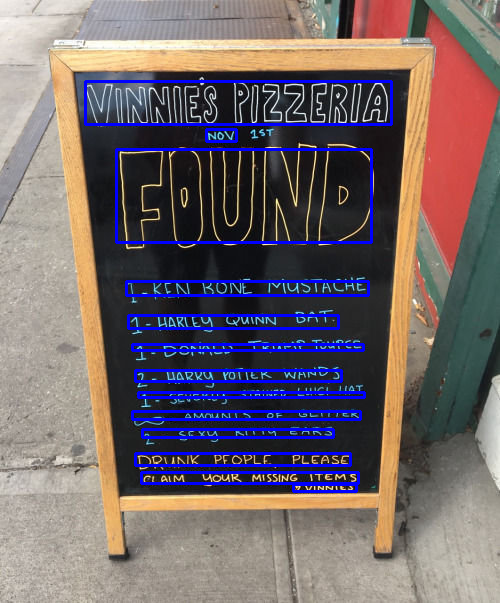

In [5]:
draw_boxes(img, boxes)

In [6]:
# calculating text area in percentage to total image area

boxes_area(boxes)/(img.size[0]*img.size[1])

0.18869983416252073

## Predict polygons

In [7]:
%%time

polygons = model.get_polygons(img)

CPU times: user 89.1 ms, sys: 40.9 ms, total: 130 ms
Wall time: 77.3 ms


/home/jovyan/pavlov/githubs/CRAFT-text-detection/CRAFT/craft_utils.py:239: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  polys = np.array(polys)


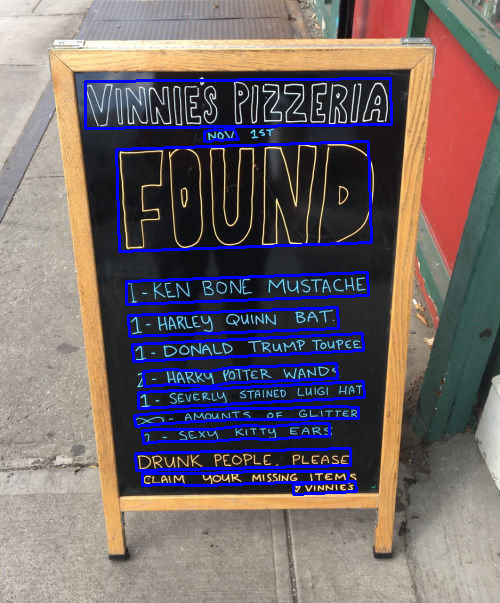

In [8]:
draw_polygons(img, polygons)

In [9]:
# calculating text area in percentage to total image area

polygons_area(polygons)/(img.size[0]*img.size[1])

0.23886567164179104